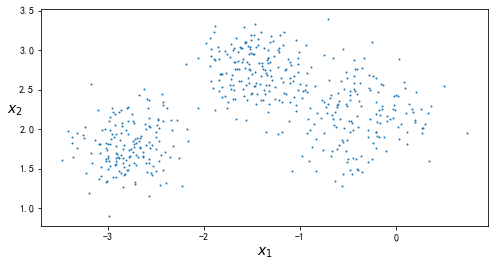

In [56]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
#随机设置3个簇的质心
blob_centers = np.array(
    [[-0.4,2.2],
     [-1.5,2.8],
     [-2.8,1.8]
    ])
#3个簇的标准差
blob_std =np.array([0.4,0.3,0.3])
#为聚类产生一个数据集和相应的标签
X,y = make_blobs(n_samples=500,centers=blob_centers,
                     cluster_std = blob_std,random_state=7)
def plot_clusters(X, y=None):
#显示数据集
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [58]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    #显示质心点
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

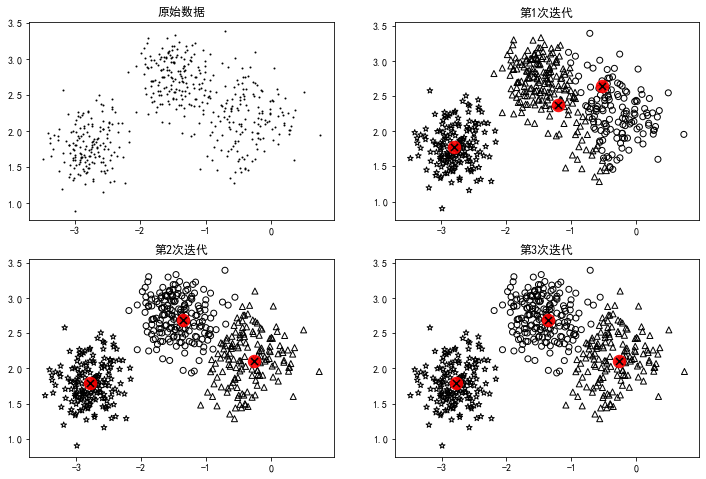

In [79]:
from sklearn.cluster import KMeans
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
k = 3
#创建3个kmeans模型，分别执行1次，2次，3次迭代
kmeans_iter1 = KMeans(n_clusters = 3,init = 'random',
                      n_init = 1,max_iter=1,random_state=1).fit(X)
kmeans_iter2 = KMeans(n_clusters = 3,init = 'random',
                      n_init = 2,max_iter=1,random_state=1).fit(X)
kmeans_iter3 = KMeans(n_clusters = 3,init = 'random',
                      n_init = 3,max_iter=1,random_state=1).fit(X)
#显示聚类效果
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.title('原始数据')
plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
mValue = ['^','o','*']
plt.subplot(222)
plt.title('第1次迭代')
for label in range(0,k):
    XX=X[kmeans_iter1.labels_==label]
    plt.scatter(XX[:, 0], XX[:, 1], marker=mValue[label],c='',edgecolors='k')
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='k')
plt.subplot(223)
plt.title('第2次迭代')
for label in range(0,k):
    XX=X[kmeans_iter2.labels_==label]
    plt.scatter(XX[:, 0], XX[:, 1], marker=mValue[label],c='',edgecolors='k')
plot_centroids(kmeans_iter2.cluster_centers_, circle_color='r', cross_color='k')
plt.subplot(224)
plt.title('第3次迭代')
for label in range(0,k):
    XX=X[kmeans_iter3.labels_==label]
    plt.scatter(XX[:, 0], XX[:, 1], marker=mValue[label],c='',edgecolors='k')
plot_centroids(kmeans_iter3.cluster_centers_, circle_color='r', cross_color='k')

In [68]:
kmeans_iter1.inertia_

165.33784324265721

In [69]:
kmeans_iter2.inertia_

99.91067127703192

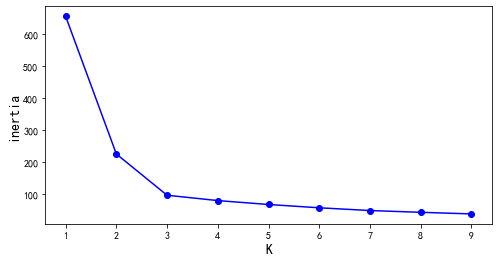

In [83]:
#建立聚类模型，K值变化范围：1-9，用来对比inertia属性
kmeans_per_k = [KMeans(n_clusters = k).fit(X) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8,4))
plt.xlabel("K", fontsize=14)
plt.ylabel("inertia", fontsize=14)
plt.plot(range(1,10),inertias,'bo-')
plt.show()

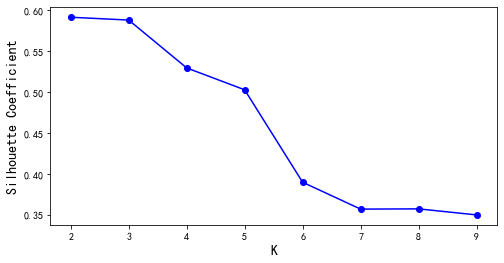

In [86]:
#导入轮廓系数的相关库
from sklearn.metrics import silhouette_score
#对比K取值1-9，观察轮廓系数变化
kmeans_per_k = [KMeans(n_clusters = k).fit(X) for k in range(1,10)]
silhouette_scores = [silhouette_score(X,model.labels_) for model in kmeans_per_k[1:]]
plt.figure(figsize=(8,4))
plt.xlabel("K", fontsize=14)
plt.ylabel("Silhouette Coefficient", fontsize=14)
plt.plot(range(2,10),silhouette_scores,'bo-')
plt.show()

In [1]:
#生成模拟数据
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]
plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

NameError: name 'make_blobs' is not defined

Text(0.5, 1.0, 'Bad - model')

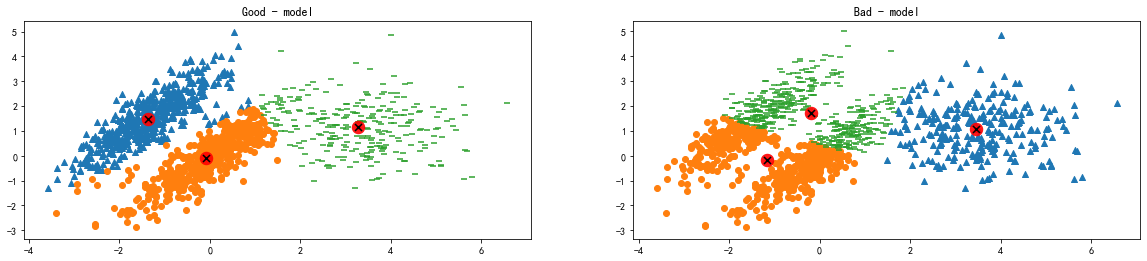

In [126]:
#分别创建两个kmeans模型，第一个指定初始质心，第二个随机初始质心
kmeans_good = KMeans(n_clusters=3,init=np.array([[-1.5,2.5],[0.5,0],[4,0]])
                     ,n_init=1,random_state=42)
kmeans_bad = KMeans(n_clusters=3,random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)
#显示第一个聚类效果
plt.figure(figsize = (20,4))
plt.subplot(121)
mValue = ['^','o','_']
for label in range(0,k):
    XX=X[kmeans_good.labels_==label]
    plt.scatter(XX[:, 0], XX[:, 1], marker=mValue[label])
plot_centroids(kmeans_good.cluster_centers_, circle_color='r', cross_color='k')
plt.title('Good - model')
#显示第二个聚类效果
plt.subplot(122)
for label in range(0,k):
    XX=X[kmeans_bad.labels_==label]
    plt.scatter(XX[:, 0], XX[:, 1], marker=mValue[label])
plot_centroids(kmeans_bad.cluster_centers_, circle_color='r', cross_color='k')
plt.title('Bad - model')

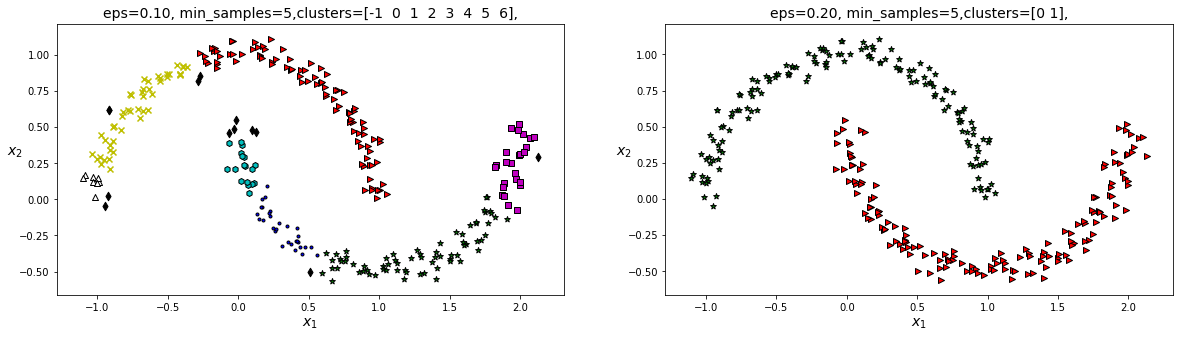

In [176]:
#导入相关库文件
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
#生成数据集，from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, noise=0.05, random_state=42)
# plt.plot(X[:,0],X[:,1],'b.')

#创建DBSCAN模型1，eps = 0.1,min_samples=5
dbscan1 = DBSCAN(eps = 0.1,min_samples=5)
y_predict1=dbscan1.fit_predict(X)
dbscan1.labels_[:10]
dbscan1.core_sample_indices_[:10]

#创建DBSCAN模型2，eps = 0.2,min_samples=5
dbscan2 = DBSCAN(eps = 0.2,min_samples=5)
y_predict2=dbscan2.fit_predict(X)

def plot_dbscan(dbscan, X, Y_pred):
#展示聚类效果  
    cValue = ['r','g','b','y','m','c','w','k']
    mValue = ['>','*','.','x','s','h','^','d']
    for x1,x2,i in zip(X[:,0],X[:,1],Y_pred):
        #画出散点图
        plt.scatter(x1, x2, marker=mValue[i],c=cValue[i],edgecolors='k')  
    #设置标题
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.title("eps={:.2f}, min_samples={},clusters={},".format(dbscan.eps, 
                dbscan.min_samples,np.unique(dbscan.labels_)), fontsize=14)
#参数eps不同，对比显示聚类图像
plt.figure(figsize=(20,5))
plt.subplot(121)
plot_dbscan(dbscan1, X,y_predict1)
plt.subplot(122)
plot_dbscan(dbscan2, X, y_predict2)
plt.show()

# 图像分割

In [1]:

#导入库函数
from matplotlib.image import imread
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#加载图片ladybug.png
image = imread('ladybug.png')
#将图像矩阵转换为3列的形式表示
X = image.reshape(-1,3)
X.shape



(426400, 3)

In [3]:

#建立kmeans模型，指定簇的数目k=8
kmeans = KMeans(n_clusters = 8,random_state=42).fit(X)
#输出簇的中心点
kmeans.cluster_centers_
#建立kmeans模型，指定簇的数目k=8
kmeans = KMeans(n_clusters = 8,random_state=42).fit(X)
#输出簇的中心点
kmeans.cluster_centers_

array([[0.98326355, 0.9351094 , 0.02573261],
       [0.02240384, 0.11051449, 0.00579273],
       [0.21762744, 0.38532948, 0.0572455 ],
       [0.7599995 , 0.20910062, 0.04433527],
       [0.09915568, 0.25297862, 0.01673489],
       [0.6116277 , 0.6297308 , 0.38689855],
       [0.37087163, 0.52249783, 0.156312  ],
       [0.8831067 , 0.72412664, 0.03478576]], dtype=float32)

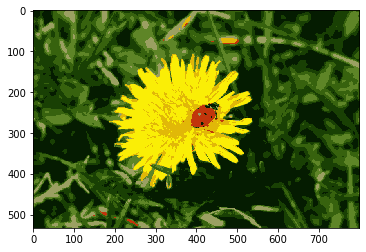

In [4]:
#将所有样本点的值都替换为所在簇的质心点值
#矩阵转换为533*800*3，并赋值给图像矩阵segmented_img 
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(533, 800, 3)
#输出图像
plt.imshow(segmented_img)


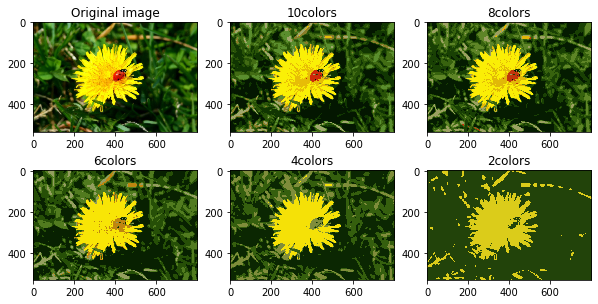

In [6]:

#新建列表segmented_imgs
segmented_imgs = []
K = (10,8,6,4,2)
for n_cluster in K:
    #取不同的K值，建立相应的kmeans模型
    kmeans = KMeans(n_clusters = n_cluster,random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    #聚类结果添加到列表segmented_imgs
    segmented_imgs.append(segmented_img.reshape(image.shape))
plt.figure(figsize=(10,5))
plt.subplot(231)
plt.imshow(image)
plt.title('Original image')
for idx,n_clusters in enumerate(K):
    #显示列表中的各个图像
    plt.subplot(232+idx)
    plt.imshow(segmented_imgs[idx])
    plt.title('{}colors'.format(n_clusters))